In [1]:
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
import sys, os

sys.path.append('../')

from src.utils import load_config, split_into_sentences, flatten_list
from src import stats_analysis as sa
from src.similarity_metrics import add_vectors_do_dataframe

from src.semantic_density import cluster_density_score, embeddings_trajectory_score,compute_mean_dtw_distance, dimensionality_reduction_score, regression_coef_density_score, compute_density_RFE_selection_score
from src.semantic_density import features_methods, cluster_methods, regression_methods, reduction_methods, compute_all_semantic_scores, narrative_speed_score
from src.similarity_metrics import compute_similarity_features
from src import stats_analysis as sa

config = load_config('../config.yaml')

[nltk_data] Downloading package punkt to /home/robin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
text_list = ["Widows receive only half of their late husband's pension. Unmarried women receive a pension equal to half of that received by their deceased husbands. Widows receive merely half of their deceased spouse's pension. They receive only fifty percent of what their husbands received when he was alive. When he died, the wives of pensioners shared their entire pension.Before the husbands' death, wives of pensioners used to share their full pension with them. Widows are granted only fifty percent of the pension that belonged to their deceased husbands.",
             "The blacksmith is dressed in black pants and a light-colored hat, with a gray and dark-brown jacket. He holds the pickaxe in his hand and taps it with a hammer on the pickaxe. He's holding the pickaxe in his hand and tapping it with a hammer on the pickaxe. The end of this tool, called the pickaxe, is pointed, and the other end is square. To turn it red with the pickaxe, he а put it in the fire and the hands are red. Now the pickaxe is red, and so are the blacksmith's hands. The fire is lit.",
             "Charlot, a factory worker, is tasked with tightening bolts on a monotonous production line. An incident disrupts the line, leading to his selection as a guinea pig to test a machine for feeding workers. However, a mishap occurs, thrusting him into the role of a test subject for a new worker-feeding machine. The experiment drives him mad, prompting him to spray his colleagues with oil. Hospitalized because of his mental state, he is released after an incident in which he is mistaken for a protest leader and thrown into prison. In prison, he becomes a model inmate but finds himself unwillingly involved in an escape attempt.",
             "The story begins with a widow and her son, Jack, who are poor and need to sell their cow for money. Jack takes the cow into town and is offered magic beans in exchange for it.Jack ascends the beanstalk, hoping to discover something to eat. When his mother sees he’s brought home beans instead of money, she throws the beans out the window.A great beanstalk grows into the clouds. Jack climbs the stalk in hopes of finding food. He comes across a town among the clouds and is helped by a magic fairy to find a giant’s castle (home to the giant who killed Jack’s father)",
             "Charlot, a factory worker, is tasked with tightening bolts on a monotonous production line. An incident disrupts the line, leading to his selection as a guinea pig to test a machine for feeding workers. The experiment drives him mad, prompting him to spray his colleagues with oil. Hospitalized because of his mental state, he is released after an incident in which he is mistaken for a protest leader and thrown into prison. In prison, he becomes a model inmate, but finds himself unwillingly involved in an escape attempt. His accidental participation leads to an early pardon.",
             "The smell of freshly baked bread wafted from the kitchen. One day a man was bathing, because he knew how to swim. My grandmother has two goats. He holds the pickaxe in his hand and taps it with a hammer on the pickaxe. Since graduating from high school, she's been at a loss as to what to do next. Widows receive only half of their late husband's pension. Charlot, a factory worker, is tasked with tightening bolts on a monotonous production line"]

label_list = ["extreme_repetition", "high_repetition", "one_consecutive_repetition", "one_distant_repetition","normal", "no_repetition"]
data = pd.DataFrame()
data['text'] = text_list
data['label'] = label_list
data['sentences'] = data['text'].apply(lambda x: split_into_sentences(x))
data = compute_similarity_features(data, config, col_text='text', para=False)
data = add_vectors_do_dataframe(data, config)
data['paragraphs_vector'] = data['sentence_sim_vectors'].apply(lambda x: np.mean(x, axis=0) if x is not None else np.zeros(768))
data, _ = compute_all_semantic_scores(data)

w2v
fast_text
glove
sentence_sim
lemma


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [8]:
all_cosine_sentences_similarity_mean = data.filter(regex = '(sentence_sim|glove|w2v|fast_text)(.*)(all_cosine_sentences_similarity_mean)').columns.tolist()
all_cosine_sentences_similarity_std = data.filter(regex = '(sentence_sim|glove|w2v|fast_text)(.*)(all_cosine_sentences_similarity_std)').columns.tolist()
all_wmd_sentences_similarity_mean = data.filter(regex = '(sentence_sim|glove|w2v|fast_text)(.*)(all_wmd_sentences_similarity_mean)').columns.tolist()
all_wmd_sentences_similarity_std = data.filter(regex = '(sentence_sim|glove|w2v|fast_text)(.*)(all_wmd_sentences_similarity_std)').columns.tolist()


consecutive_cosine_sentences_similarity_mean = data.filter(regex = '(sentence_sim|glove|w2v|fast_text)(.*)(consecutive_cosine_sentences_similarity_mean)').columns.tolist()
consecutive_cosine_sentences_similarity_std = data.filter(regex = '(sentence_sim|glove|w2v|fast_text)(.*)(consecutive_cosine_sentences_similarity_std)').columns.tolist()
consecutive_wmd_sentences_similarity_mean = data.filter(regex = '(sentence_sim|glove|w2v|fast_text)(.*)(consecutive_wmd_sentences_similarity_mean)').columns.tolist()


data['all_cosine_sentences_similarity_mean'] = data[all_cosine_sentences_similarity_mean].mean(axis = 1)
data['all_cosine_sentences_similarity_mean_std'] = data[all_cosine_sentences_similarity_mean].std(axis = 1)
data['all_cosine_ci'] = 1.96 * (data['all_cosine_sentences_similarity_mean_std'] / (len(all_cosine_sentences_similarity_mean) ** 0.5))


data['all_cosine_sentences_similarity_std'] = data[all_cosine_sentences_similarity_std].mean(axis = 1)
data['all_cosine_sentences_similarity_std_std'] = data[all_cosine_sentences_similarity_std].std(axis = 1)
data['all_cosine_ci_std'] = 1.96 * (data['all_cosine_sentences_similarity_std_std'] / (len(all_cosine_sentences_similarity_std) ** 0.5))


data['consecutive_cosine_sentences_similarity_mean'] = data[consecutive_cosine_sentences_similarity_mean].mean(axis = 1)
data['consecutive_cosine_sentences_similarity_mean_std'] = data[consecutive_cosine_sentences_similarity_mean].std(axis = 1)
data['consecutive_cosine_ci'] = 1.96 * (data['consecutive_cosine_sentences_similarity_mean_std'] / (len(consecutive_cosine_sentences_similarity_mean) ** 0.5))

data['consecutive_cosine_sentences_similarity_std'] = data[consecutive_cosine_sentences_similarity_std].mean(axis = 1)
data['consecutive_cosine_sentences_similarity_std_std'] = data[consecutive_cosine_sentences_similarity_std].std(axis = 1)
data['consecutive_cosine_ci_std'] = 1.96 * (data['consecutive_cosine_sentences_similarity_std_std'] / (len(consecutive_cosine_sentences_similarity_std) ** 0.5))


data["consecutive_wmd_sentences_similarity_mean"] = data[consecutive_wmd_sentences_similarity_mean].mean(axis = 1)
data["consecutive_wmd_sentences_similarity_mean_std"] = data[consecutive_wmd_sentences_similarity_mean].std(axis = 1)
data["consecutive_wmd_ci"] = 1.96 * (data["consecutive_wmd_sentences_similarity_mean_std"] / (len(consecutive_wmd_sentences_similarity_mean) ** 0.5))

data['all_wmd_sentences_similarity_mean'] = data[all_wmd_sentences_similarity_mean].mean(axis = 1)
data['all_wmd_sentences_similarity_mean_std'] = data[all_wmd_sentences_similarity_mean].std(axis = 1)
data['all_wmd_ci'] = 1.96 * (data['all_wmd_sentences_similarity_mean_std'] / (len(all_wmd_sentences_similarity_mean) ** 0.5))




data['all_wmd_sentences_similarity_std'] = data[all_wmd_sentences_similarity_std].mean(axis = 1)
data['all_wmd_sentences_similarity_std_std'] = data[all_wmd_sentences_similarity_std].std(axis = 1)
data['all_wmd_ci_std'] = 1.96 * (data['all_wmd_sentences_similarity_std_std'] / (len(all_wmd_sentences_similarity_std) ** 0.5))



Structural_density = [
                      'cluster_density_score_HDBSCAN', 
                      'cluster_reverse_silhouette_score_HDBSCAN',
                      'cluster_density_score_MeanShift', 
                      'cluster_reverse_silhouette_score_MeanShift',
                      'reduction_score_PCA_explained_variance', 
                      'reduction_score_PCA_prop_of_components',]

Semantic_contribution = ['regression_coef_density_score_Lasso',
 'regression_error_score_Lasso',
 'reduction_score_Lasso',
 ]

data['narrative_speed_ci'] = 0

data['structural_density'] = data[Structural_density].mean(axis = 1)
data['structural_density_std'] = data[Structural_density].std(axis = 1)
data['structural_density_ci'] = 1.96 * (data['structural_density_std'] / (len(Structural_density) ** 0.5))

data['semantic_contribution'] = data[Semantic_contribution].mean(axis = 1)
data['semantic_contribution_std'] = data[Semantic_contribution].std(axis = 1)
data['semantic_contribution_ci'] = 1.96 * (data['semantic_contribution_std'] / (len(Semantic_contribution) ** 0.5))



narrative_progression_features = [
    'narrative_speed_score'
]

# Global Topic Structure
global_topic_structure_features = [
    'cluster_density_score_MeanShift',
    'cluster_reverse_silhouette_score_MeanShift'
]

# Local Topic Structure
local_topic_structure_features = [
    'cluster_density_score_HDBSCAN',
    'cluster_reverse_silhouette_score_HDBSCAN'
]

# Semantic Complexity
semantic_complexity_features = [
    'reduction_score_PCA_explained_variance',
    'regression_error_score_Lasso'
]

data['global_topic_structure'] = data[global_topic_structure_features].mean(axis = 1)
data["global_topic_structure_ci"] = 1.96 * (data[global_topic_structure_features].std(axis = 1) / (len(global_topic_structure_features) ** 0.5))

data['local_topic_structure'] = data[local_topic_structure_features].mean(axis = 1)
data["local_topic_structure_ci"] = 1.96 * (data[local_topic_structure_features].std(axis = 1) / (len(local_topic_structure_features) ** 0.5))

data['semantic_complexity'] = data[semantic_complexity_features].mean(axis = 1)
data["semantic_complexity_ci"] = 1.96 * (data[semantic_complexity_features].std(axis = 1) / (len(semantic_complexity_features) ** 0.5))




In [45]:
from sklearn.cluster import AgglomerativeClustering, DBSCAN, MeanShift, OPTICS, HDBSCAN

from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA, KernelPCA
from umap import UMAP
from umap import validation

method = 'MeanShift'
i = 0
embeddings = data['sentence_sim_vectors'].loc[i]
text = data['sentences'].loc[i]  
X = np.array(embeddings)

if method == 'OPTICS':
    clustering = OPTICS(min_samples=2)  
elif method == 'HDBSCAN':
    clustering = HDBSCAN(min_cluster_size=2,metric="cosine")  # Example: HDBSCAN Clustering
elif method == 'MeanShift':
    clustering = MeanShift()  # Example: Mean Shift Clustering
else:
    raise ValueError("Invalid method. Choose from 'Agglomerative', 'DBSCAN', 'OPTICS', 'HDBSCAN', or 'MeanShift'.")
try : 
    cluster_labels = clustering.fit_predict(X)

    # Compute the silhouette score
    silhouette = 1 - silhouette_score(X, cluster_labels) #* len(embeddings)

    # Compute the ratio of the number of clusters to the number of sentences
    cluster_density = len(set(cluster_labels)) / len(X)
except Exception as e:
    print(e)
    cluster_density = 0
    silhouette = 0

cluster_dict = {}
print(cluster_density)
# Loop through each sentence and its corresponding cluster
for cluster, sentence in zip(cluster_labels, text):
    if cluster not in cluster_dict:
        cluster_dict[cluster] = []
    cluster_dict[cluster].append(sentence)

# Print the clusters and their associated sentences
for cluster, sentences in cluster_dict.items():
    print(f"Cluster {cluster}:")
    for sentence in sentences:
        print(f"  - {sentence}")
    print()


0.7142857142857143
Cluster 0:
  - Widows receive only half of their late husband's pension.
  - Widows receive merely half of their deceased spouse's pension.

Cluster 2:
  - Unmarried women receive a pension equal to half of that received by their deceased husbands.

Cluster 3:
  - They receive only fifty percent of what their husbands received when he was alive.

Cluster 1:
  - When he died, the wives of pensioners shared their entire pension.
  - Before the husbands' death, wives of pensioners used to share their full pension with them.

Cluster 4:
  - Widows are granted only fifty percent of the pension that belonged to their deceased husbands.



Cluster 0:
  - Charlot, a factory worker, is tasked with tightening bolts on a monotonous production line.
  - An incident disrupts the line, leading to his selection as a guinea pig to test a machine for feeding workers.
  - The experiment drives him mad, prompting him to spray his colleagues with oil.

Cluster 1:
  - Hospitalized because of his mental state, he is released after an incident in which he is mistaken for a protest leader and thrown into prison.
  - In prison, he becomes a model inmate, but finds himself unwillingly involved in an escape attempt.
  - His accidental participation leads to an early pardon.



In [57]:
all_cosine_sentences_similarity_mean

['w2v_all_cosine_sentences_similarity_mean',
 'fast_text_all_cosine_sentences_similarity_mean',
 'glove_all_cosine_sentences_similarity_mean',
 'sentence_sim_all_cosine_sentences_similarity_mean']

In [48]:
scores = data.filter(regex='score').columns.tolist()
mean_sim_metrics = data.filter(regex = '(sentence_sim|w2v|glove|fast_text|jaccard)(.*)(mean)').columns.tolist()
std_sim_metrics = data.filter(regex = '(sentence_sim|w2v|glove|fast_text|jaccard)(.*)(std)').columns.tolist()
scores

['narrative_speed_score',
 'reduction_score_PCA_explained_variance',
 'reduction_score_PCA_prop_of_components',
 'cluster_density_score_HDBSCAN',
 'cluster_reverse_silhouette_score_HDBSCAN',
 'cluster_density_score_MeanShift',
 'cluster_reverse_silhouette_score_MeanShift',
 'regression_coef_density_score_Lasso',
 'regression_error_score_Lasso',
 'reduction_score_Lasso']

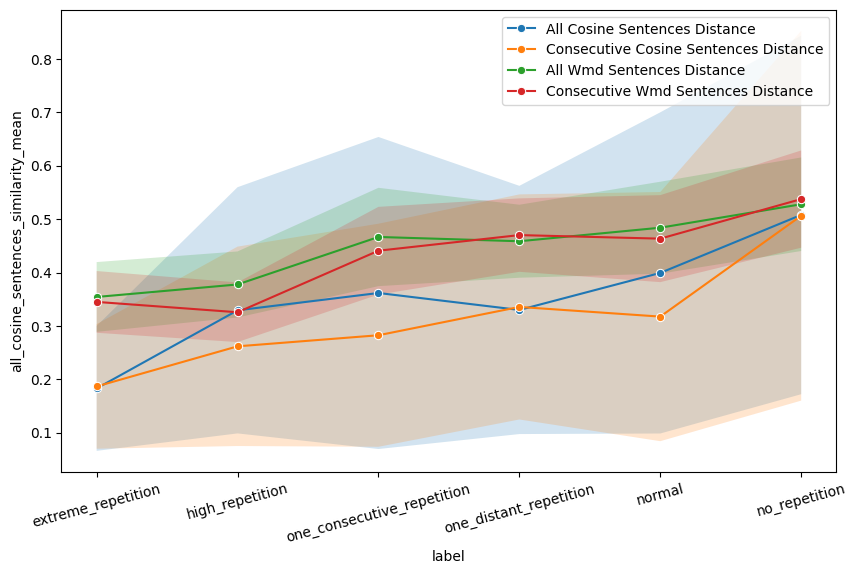

In [9]:

mean_columns = ['all_cosine_sentences_similarity_mean', 'consecutive_cosine_sentences_similarity_mean', 'all_wmd_sentences_similarity_mean',"consecutive_wmd_sentences_similarity_mean"]
ci_columns = ['all_cosine_ci', 'consecutive_cosine_ci', 'all_wmd_ci', "consecutive_wmd_ci"]


def lineplot_with_ci(data, values_columns, ci_columns, label_name = "label"):
    plt.figure(figsize=(10, 6))

    # Get the unique labels for x-axis
    labels = data[label_name]

    #Loop through each pair of mean and CI columns
    for mean_col, ci_col in zip(values_columns, ci_columns):
        mean_values = data[mean_col]
        ci_values = data[ci_col]

        # Plot the line with markers
        sns.lineplot(x=labels, y=mean_values, label=mean_col.replace('_mean', '').replace('_', ' ').replace("similarity","distance").title(), marker='o')

        # Fill the confidence interval
        plt.fill_between(labels, mean_values - ci_values, mean_values + ci_values, alpha=0.2)
    
    plt.xticks(rotation=15)
    plt.show()

lineplot_with_ci(data, mean_columns, ci_columns, label_name = "label")

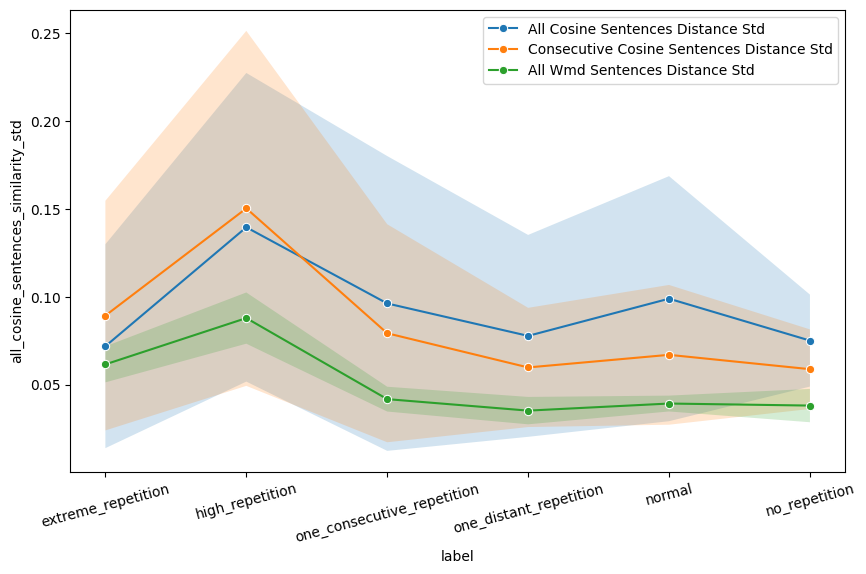

In [5]:
std_columns = ['all_cosine_sentences_similarity_std', 'consecutive_cosine_sentences_similarity_std', 'all_wmd_sentences_similarity_std']

#data = data.rename(columns = {'all_cosine_sentences_similarity_mean': 'All Cosine Distances', 'consecutive_cosine_sentences_similarity_mean': 'All Consecutive Cosine Distances', 'all_wmd_sentences_similarity_mean': 'All WMD Distances'},)
std_ci_columns = ['all_cosine_ci_std', 'consecutive_cosine_ci_std', 'all_wmd_ci_std']

lineplot_with_ci(data, std_columns, std_ci_columns, label_name = "label")

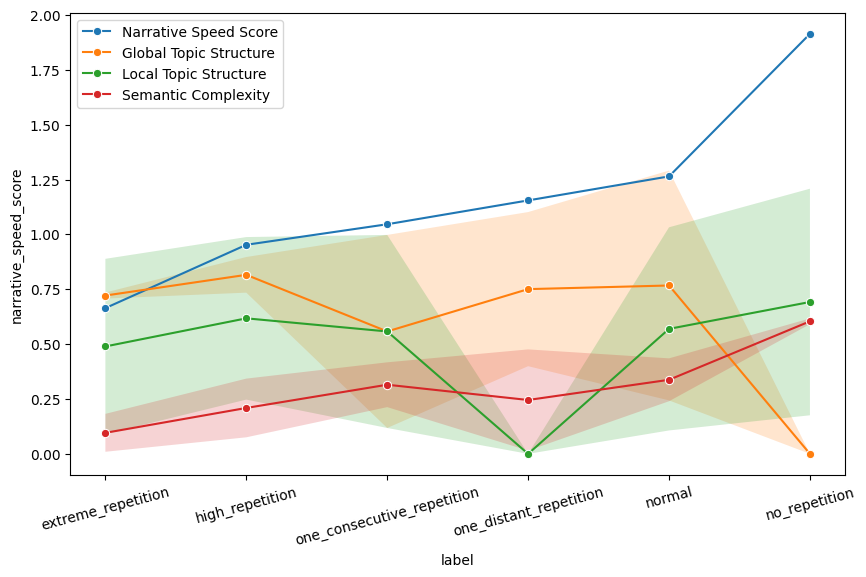

In [7]:
density_columns = ["narrative_speed_score", "global_topic_structure", "local_topic_structure", "semantic_complexity"]
density_ci_columns = ['narrative_speed_ci', 'global_topic_structure_ci', 'local_topic_structure_ci', 'semantic_complexity_ci']

#data = data.rename(columns = {'all_cosine_sentences_similarity_mean': 'All Cosine Distances', 'consecutive_cosine_sentences_similarity_mean': 'All Consecutive Cosine Distances', 'all_wmd_sentences_similarity_mean': 'All WMD Distances'},)


lineplot_with_ci(data, density_columns, density_ci_columns, label_name = "label")

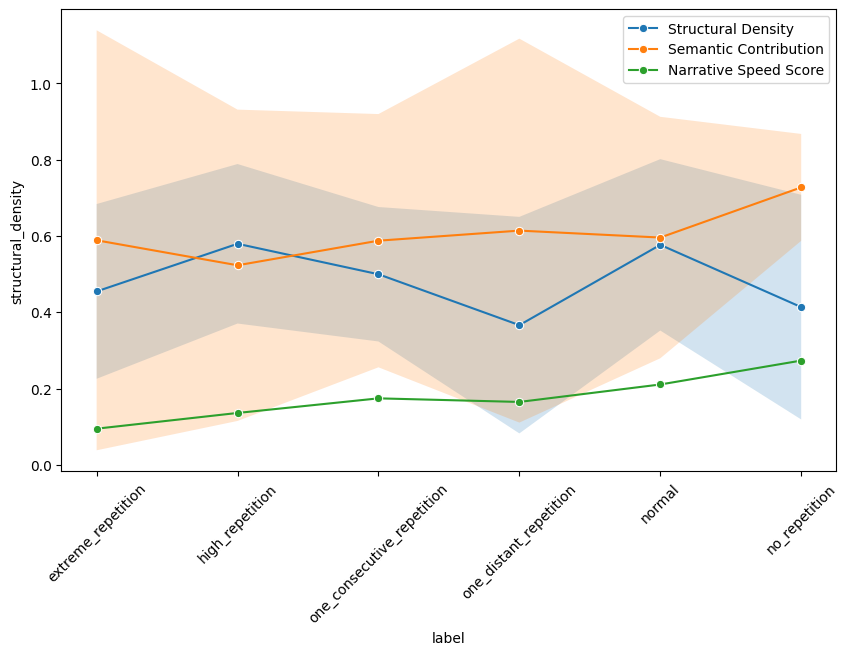

In [87]:
density_columns = ['structural_density', 'semantic_contribution',"narrative_speed_score"]

#data = data.rename(columns = {'all_cosine_sentences_similarity_mean': 'All Cosine Distances', 'consecutive_cosine_sentences_similarity_mean': 'All Consecutive Cosine Distances', 'all_wmd_sentences_similarity_mean': 'All WMD Distances'},)
density_ci_columns = ['structural_density_ci', 'semantic_contribution_ci', "narrative_speed_ci"]

lineplot_with_ci(data, density_columns, density_ci_columns, label_name = "label")

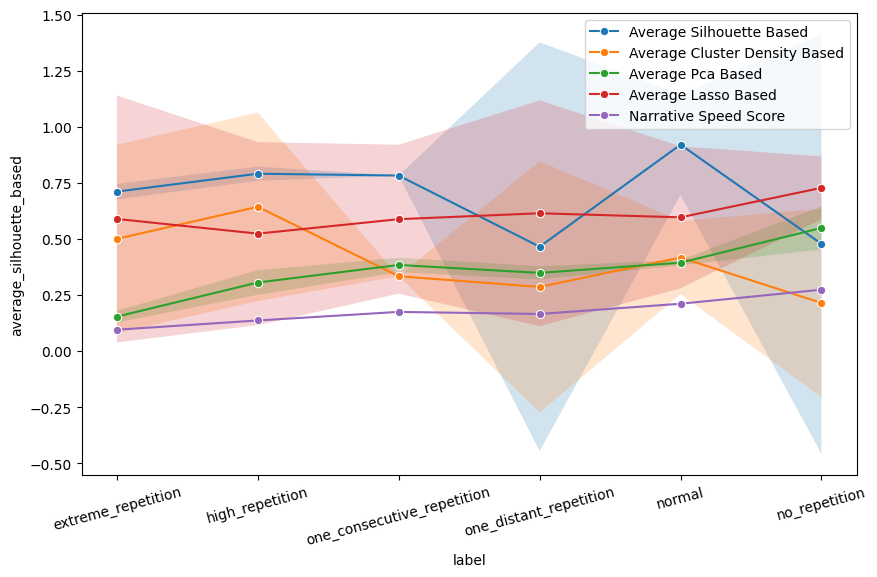

In [104]:
import matplotlib.pyplot as plt

z_score = 1.96

silhouette_based = ['cluster_reverse_silhouette_score_MeanShift', 'cluster_reverse_silhouette_score_HDBSCAN']
cluster_density_based = ['cluster_density_score_MeanShift', "cluster_density_score_HDBSCAN" ]
pca_based = ['reduction_score_PCA_explained_variance', 'reduction_score_PCA_prop_of_components']
lasso_based = ['regression_coef_density_score_Lasso', 'regression_error_score_Lasso', 'reduction_score_Lasso']

data['average_silhouette_based'] = data[silhouette_based].mean(axis = 1)
data['average_silhouette_ci'] = z_score * (data[silhouette_based].std(axis = 1) / (len(silhouette_based) ** 0.5))

data['average_cluster_density_based'] = data[cluster_density_based].mean(axis = 1)
data['average_cluster_density_ci'] = z_score * (data[cluster_density_based].std(axis = 1) / (len(cluster_density_based) ** 0.5))

data['average_pca_based'] = data[pca_based].mean(axis = 1)
data['average_pca_ci'] = z_score * (data[pca_based].std(axis = 1) / (len(pca_based) ** 0.5))

data['average_lasso_based'] = data[lasso_based].mean(axis = 1)
data['average_lasso_ci'] = z_score * (data[lasso_based].std(axis = 1) / (len(lasso_based) ** 0.5))

data['narrative_speed_score_ci'] = 0

scores_selected = ['average_silhouette_based', 'average_cluster_density_based', 'average_pca_based', 'average_lasso_based',"narrative_speed_score"]
ci_scores_columns = ['average_silhouette_ci', 'average_cluster_density_ci', 'average_pca_ci', 'average_lasso_ci',"narrative_speed_score_ci"]

lineplot_with_ci(data, scores_selected, ci_scores_columns, label_name = "label")

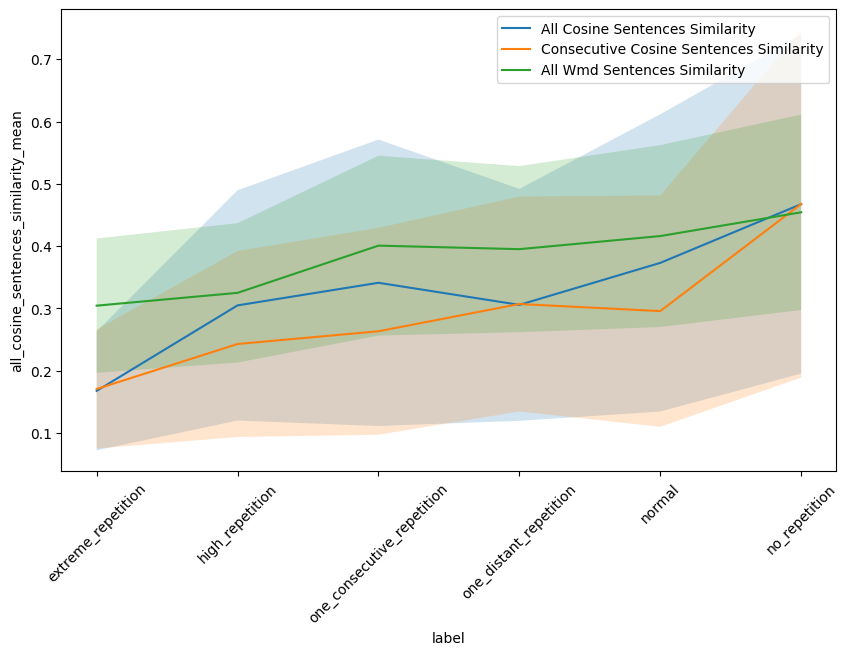

In [40]:
plt.figure(figsize=(10, 6))

# Loop through each pair of mean and CI columns
for mean_col, ci_col in zip(average_mean, ci_columns):
    sns.lineplot(data=data, x="label", y=mean_col,label=mean_col.replace('_mean', '').replace('_', ' ').title(), markers =True, dashes=False)
    
    # Adding the confidence interval manually
    plt.fill_between(data['label'], 
                     data[mean_col] - data[ci_col], 
                     data[mean_col] + data[ci_col], 
                     alpha=0.2)

# Rotate x-tick labels for readability
plt.xticks(rotation=45)

#
plt.show()

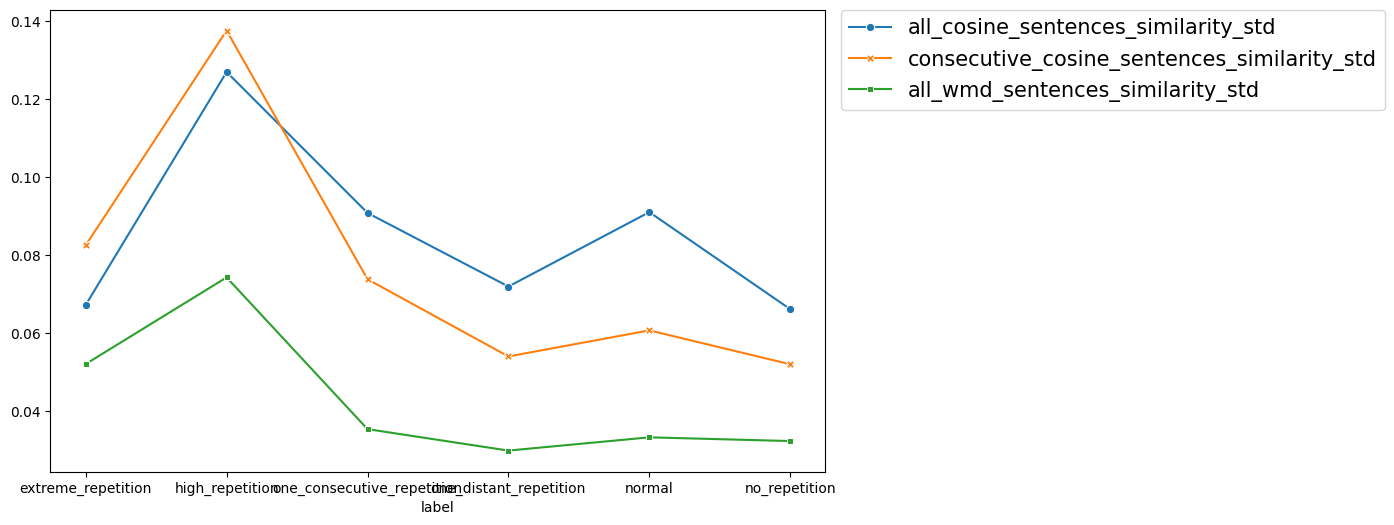

In [43]:
import matplotlib.pyplot as plt
average_mean = ["all_cosine_sentences_similarity_mean","consecutive_cosine_sentences_similarity_mean","all_wmd_sentences_similarity_mean"]
plt.figure(figsize=(10, 6))
sns.lineplot(data=data.set_index("label")[std_columns],markers=True, dashes=False)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, fontsize = 15)

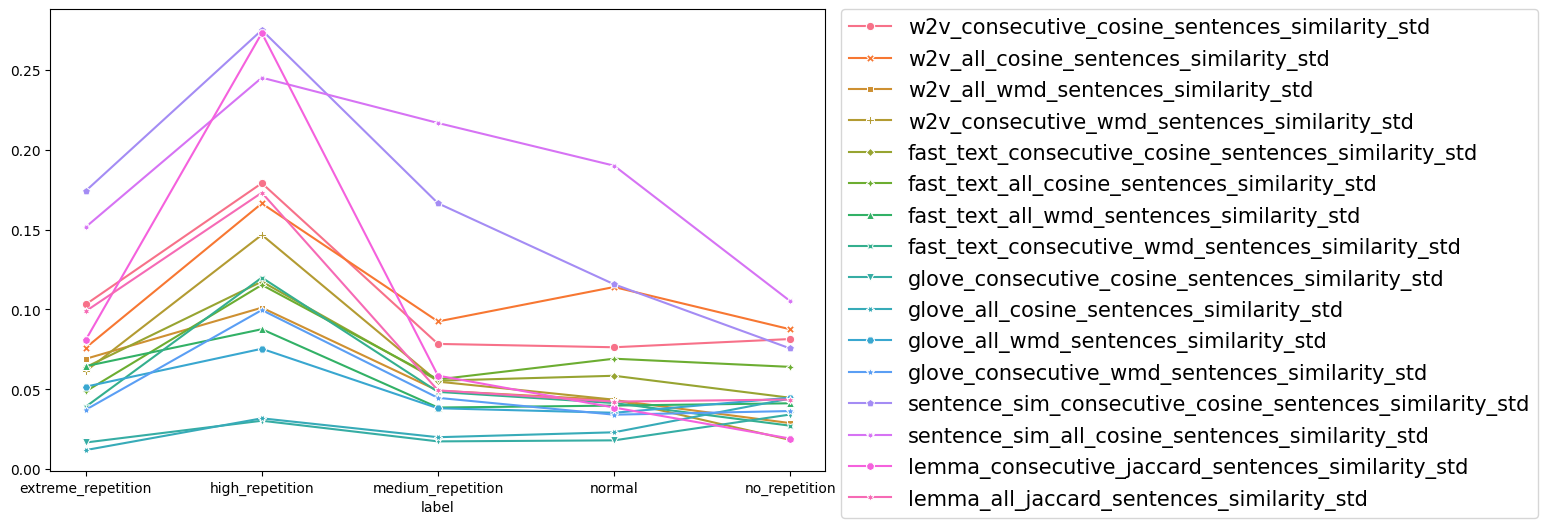

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.lineplot(data=data.set_index("label")[std_sim_metrics],markers=True, dashes=False)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, fontsize = 15)

In [19]:
test = pd.read_pickle('../data/corpus/20240503_aggregated_database_gpt-3.5-turbo_gpt2_pythia.pkl')

In [25]:
test[scores]

,narrative_speed_score,reduction_score_PCA_explained_variance,reduction_score_PCA_prop_of_components,cluster_density_score_HDBSCAN,cluster_reverse_silhouette_score_HDBSCAN,cluster_density_score_MeanShift,cluster_reverse_silhouette_score_MeanShift,regression_coef_density_score_Lasso,regression_error_score_Lasso,reduction_score_Lasso
290,0.193600,0.507038,0.428571,0.375000,0.943521,0.000000,0.000000,0.625000,0.398062,0.625000
11748,0.146563,0.300764,0.333333,0.428571,0.682241,0.857143,0.764925,0.857143,0.159901,0.714286
8691,0.072188,0.547759,0.200000,0.312500,0.912341,0.187500,0.872229,0.500000,0.398999,0.750000
1869,0.098897,0.469853,0.166667,0.307692,0.914126,0.153846,0.877984,0.692308,0.226743,0.846154
11813,0.270957,0.407887,0.400000,0.500000,0.789003,0.333333,0.855590,1.000000,0.433357,0.666667
...,...,...,...,...,...,...,...,...,...,...
5308,0.202143,0.188033,0.333333,0.000000,0.000000,0.500000,0.910145,1.000000,0.122530,0.500000
6540,0.094739,0.470340,0.153846,0.285714,0.866320,0.214286,0.912020,0.642857,0.232538,0.714286
8498,0.169536,0.460077,0.250000,0.222222,0.795717,0.333333,0.885795,0.777778,0.486821,0.777778
6956,0.115923,0.589420,0.250000,0.307692,0.964194,0.153846,0.869977,0.538462,0.471533,0.615385


<Axes: xlabel='narrative_speed_score', ylabel='temperature_norm'>

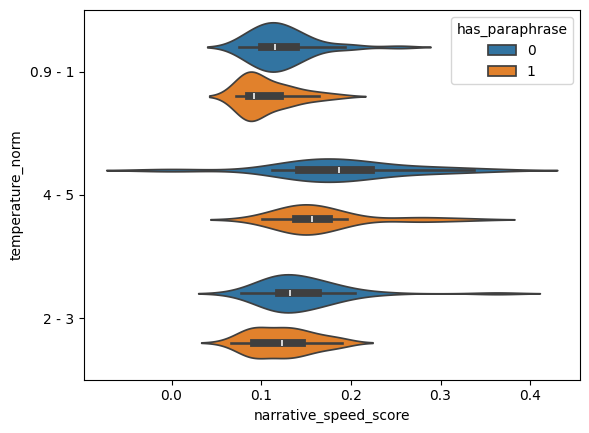

In [29]:
test['has_paraphrase'] = test['clean_paraphase_type'].apply(lambda x: 1 if x != 0 else 0)

def encode_temperature(x):
    if x<2:
        return "0.9 - 1"
    elif 2<=x<3:
        return "2 - 3"
    else :
        return "4 - 5"

test['temperature_norm'] = test['temperature'].apply(encode_temperature)

sns.violinplot(data = test, hue = "has_paraphrase", x = "narrative_speed_score", y = "temperature_norm")

he blacksmith is dressed in black pants and a light-colored hat, with a gray and dark-brown jacket. He holds the pickaxe in his hand and taps it with a hammer on the pickaxe. He's holding the pickaxe in his hand and tapping it with a hammer on the pickaxe. The end of this tool, called the pickaxe, is pointed, and the other end is square. To turn it red with the pickaxe, he а put it in the fire and the hands are red. Now the pickaxe is red, and so are the blacksmith's hands. The fire is lit.
narrative_speed_score: 0.47629666328430176


<Axes: >

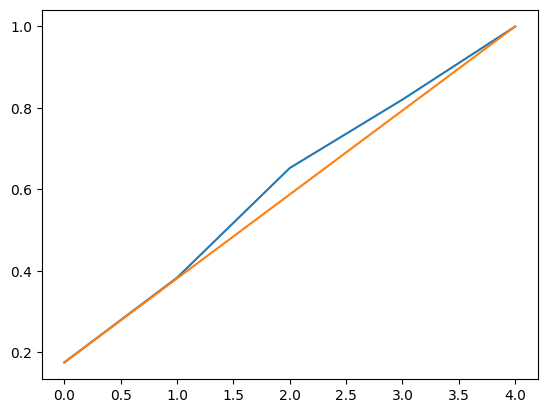

In [159]:
def narrative_speed_score(embeddings:np.array): # can be use for sentence or word embeddings
    # Compute pairwise distances between word embeddings
    distances = cosine_distances(embeddings)
    cumulative_distances = np.cumsum(np.diag(distances, k=1))

    speed = np.sum(np.abs(np.gradient(cumulative_distances))) / len(cumulative_distances)
  
    
    return speed

from sklearn.metrics.pairwise import euclidean_distances, cosine_distances
import seaborn as sns
from fastdtw import fastdtw

print(data["text"].values[i])
sentences_vect = data['sentence_sim_vectors'].values[i]

speed = narrative_speed_score(sentences_vect)
print(f"narrative_speed_score: {speed}")


sns.lineplot(y = normalized_distances, x = range(len(normalized_distances)))
sns.lineplot(y = np.linspace(normalized_distances[0], normalized_distances[-1], len(normalized_distances)), x = range(len(normalized_distances)))

In [78]:
list(range(len(normalized_distances))[1:])

[1, 2, 3, 4, 5]

In [21]:
cumulative_distances

array([0.24719858, 0.46274513, 0.855635  , 1.4430282 , 1.5094463 ,
       1.8489993 ], dtype=float32)

In [17]:
data

,text,label,sentences,w2v_vectors,w2v_vectors_words,sentence_sim_vectors,sentence_sim_vectors_words,paragraphs_vector,trajectory_score,reduction_score_PCA_explained_variance,reduction_score_PCA_prop_of_components,cluster_density_score_HDBSCAN,cluster_silhouette_score_HDBSCAN,regression_coef_density_score_BayesianRidge,regression_coef_density_score_Lasso,reduction_score_Lasso
0,Widows receive only half of their late husband...,extreme_repetition,[Widows receive only half of their late husban...,"[[0.08166504, -0.02331543, -0.07552719, 0.0831...","[[[0.20605469, 0.030273438, -0.27734375, 0.125...","[[-0.081988215, 0.24908096, 0.05735027, -0.033...","[None, None, None, None, None, None, None]","[-0.05283147, 0.35119158, -0.08806048, -0.0429...",52.710182,0.865283,0.166667,0.285714,2.378347,1.0,1.000000,0.571429
1,he blacksmith is dressed in black pants and a ...,high_repetition,[he blacksmith is dressed in black pants and a...,"[[0.05490667, 0.058482777, -0.031716086, -0.01...","[[[0.19238281, 0.12792969, -0.019165039, -0.02...","[[-0.2180691, 0.44809884, 0.07702646, 0.218240...","[None, None, None, None, None, None, None]","[-0.2082274, 0.42783913, -0.029628253, 0.20816...",75.142857,0.724466,0.333333,0.428571,1.327686,1.0,0.857143,0.571429
2,"Charlot, a factory worker, is tasked with tigh...",normal,"[Charlot, a factory worker, is tasked with tig...","[[0.030703457, 0.009654652, 0.022455389, 0.047...","[[[0.18457031, -0.15917969, 0.27734375, 0.0324...","[[-0.35118276, 0.19462943, 0.056856457, -0.139...","[None, None, None, None, None, None]","[-0.04559846, 0.27384508, -0.038072415, -0.058...",106.000125,0.612718,0.400000,0.333333,1.166486,1.0,0.833333,0.666667
3,The smell of freshly baked bread wafted from t...,no_repetition,[The smell of freshly baked bread wafted from ...,"[[0.025119357, 0.016607603, 0.005438911, 0.107...","[[[0.080078125, 0.10498047, 0.049804688, 0.053...","[[-0.28876057, 0.22848551, -0.0037150402, 0.20...","[None, None, None, None, None, None, None]","[-0.050489847, 0.21825941, 0.14972965, 0.05907...",165.030596,0.402800,0.500000,0.428571,0.313053,1.0,0.857143,0.714286


In [ ]:
def encode_temperature(x):
    if x<2:
        return "0-1"
    elif 2<=x<3:
        return "2-3"
    else :
        return '4-5'

data['temperature_norm'] = data['temperature'].apply(encode_temperature)

#sns.lineplot(data = data, y = "temperature", x = "num_sentences")
sns.boxplot(data = data, hue = "temperature_norm", y = "num_sentences")